### Check Corona Vaccinations 
version 0.3

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) 

* read the data on [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data)
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-26 08:23:50.770288


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountries = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url
2,Bahrain,2020-12-25,Sinopharm,50543,https://twitter.com/MOH_Bahrain/status/1342560...
29,United Kingdom,2020-12-24,Pfizer/BioNTech,800000,https://www.gov.uk/government/speeches/prime-m...
20,Israel,2020-12-24,Pfizer/BioNTech,208600,https://www.gov.il/he/departments/news/2512202...
1,Bahrain,2020-12-24,Sinopharm,50071,https://twitter.com/MOH_Bahrain/status/1342189...
13,Canada,2020-12-24,Pfizer/BioNTech,43525,https://github.com/ishaberry/Covid19Canada/blo...
0,Bahrain,2020-12-23,Sinopharm,38965,https://twitter.com/MOH_Bahrain/status/1341855...
30,United States,2020-12-23,"Moderna, Pfizer/BioNTech",1008025,https://covid.cdc.gov/covid-data-tracker/#vacc...
19,Israel,2020-12-23,Pfizer/BioNTech,134500,https://www.gov.il/he/departments/news/2512202...
12,Canada,2020-12-23,Pfizer/BioNTech,35204,https://github.com/ishaberry/Covid19Canada/blo...
11,Canada,2020-12-22,Pfizer/BioNTech,26287,https://github.com/ishaberry/Covid19Canada/blo...


In [4]:
#Countries in list
allCountries["location"].value_counts()

Canada              11
Israel               5
United States        4
Bahrain              3
Russia               3
Northern Ireland     2
Scotland             2
Wales                2
United Kingdom       2
England              1
China                1
Name: location, dtype: int64

In [5]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Bahrain           Sinopharm                    3
Canada            Pfizer/BioNTech             11
China             CNBG, Sinovac                1
England           Pfizer/BioNTech              1
Israel            Pfizer/BioNTech              5
Northern Ireland  Pfizer/BioNTech              2
Russia            Sputnik V                    3
Scotland          Pfizer/BioNTech              2
United Kingdom    Pfizer/BioNTech              2
United States     Moderna, Pfizer/BioNTech     4
Wales             Pfizer/BioNTech              2
dtype: int64

In [6]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 33
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            29 non-null     object        
 1   date                29 non-null     datetime64[ns]
 2   vaccine             29 non-null     object        
 3   total_vaccinations  29 non-null     int64         
 4   source_url          29 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.4+ KB


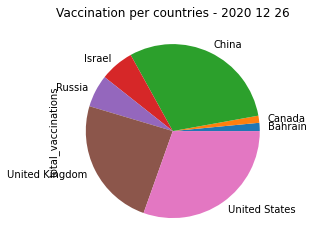

In [7]:
#Countries
%matplotlib inline    
import matplotlib.pyplot as plt   

#Reported numbers are accumulated --> get latest
plotCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine']].groupby('location').apply(lambda x: x.head(1))
plotCountries = plotCountries.set_index('location')
plotCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperCountry.png')  
plt.show() 


In [8]:
plotCountries.sort_values(by='total_vaccinations',ascending=True)

,total_vaccinations,vaccine
location,,
Canada,43525,Pfizer/BioNTech
Bahrain,50543,Sinopharm
Russia,200000,Sputnik V
Israel,208600,Pfizer/BioNTech
United Kingdom,800000,Pfizer/BioNTech
China,1000000,"CNBG, Sinovac"
United States,1008025,"Moderna, Pfizer/BioNTech"


In [9]:
plotCountries.sum()

total_vaccinations                                              3310693
vaccine               SinopharmPfizer/BioNTechCNBG, SinovacPfizer/Bi...
dtype: object

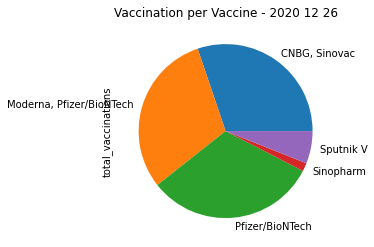

In [10]:
# Vaccine numbers
plotVaccine = plotCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperVaccine.png')  
plt.show()

In [11]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinopharm                     50543
Sputnik V                    200000
CNBG, Sinovac               1000000
Moderna, Pfizer/BioNTech    1008025
Pfizer/BioNTech             1052125
Name: total_vaccinations, dtype: int64

In [12]:
# Sweden have 10 000 doses....

In [13]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-26 08:23:52.421455
Time elapsed (hh:mm:ss.ms) 0:00:01.651404


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata
* "translates" the labels to Wikidata Qnumber see reconciliationCountries_dict 

In [14]:
reconciliationCountries_dict = {
    "Bahrain" : "Q398",
    "Canada" : "Q16",
    "China" : "Q148",
    "Israel" : "Q801",
    "Russia" : "Q159",
    "United Kingdom" : "Q145",
    "United States" : "Q30"}
reconciliationCountries = pd.DataFrame.from_dict([reconciliationCountries_dict]).T
reconciliationCountries.columns = ["WD"]
reconciliationCountries.index.name = "Country"

In [15]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/r$X
queryWD = """SELECT DISTINCT ?country (REPLACE(STR(?country), ".*Q", "Q") AS ?qid) ?countryLabel ?population ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index WHERE {
  ?country wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?country wdt:P298 ?ISO3166_1. }
  OPTIONAL { ?country wdt:P2132 ?nominalGDPperCapita. }
  OPTIONAL { ?country wdt:P2299 ?PPP_GDP_per_capita. }
  OPTIONAL { ?country wdt:P1081 ?Human_Development_Index. }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index"""


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   country                  225 non-null    object
 1   qid                      225 non-null    object
 2   countryLabel             225 non-null    object
 3   population               225 non-null    object
 4   ISO3166_1                225 non-null    object
 5   nominalGDPperCapita      221 non-null    object
 6   PPP_GDP_per_capita       215 non-null    object
 7   Human_Development_Index  216 non-null    object
dtypes: object(8)
memory usage: 14.2+ KB


In [16]:
#plotCountries

In [17]:
plotCountriesPopulation = pd.merge(plotCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
plotCountriesPopulation

,total_vaccinations,vaccine,WD,_merge
location,,,,
Bahrain,50543,Sinopharm,Q398,both
Canada,43525,Pfizer/BioNTech,Q16,both
China,1000000,"CNBG, Sinovac",Q148,both
Israel,208600,Pfizer/BioNTech,Q801,both
Russia,200000,Sputnik V,Q159,both
United Kingdom,800000,Pfizer/BioNTech,Q145,both
United States,1008025,"Moderna, Pfizer/BioNTech",Q30,both


In [18]:
#Missing
#WDmissing = plotCountriesPopulation[plotCountriesPopulation["_merge"] == "left_only"].copy()
#WDmissing
del plotCountriesPopulation['_merge']

In [19]:
WDpopulation.sample(5)

,country,qid,countryLabel,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index
11,http://www.wikidata.org/entity/Q924,Q924,Tanzania,57310019,TZA,958,2947.8,0.538
146,http://www.wikidata.org/entity/Q212,Q212,Ukraine,42558328,UKR,2639,8698.653,0.747
171,http://www.wikidata.org/entity/Q334,Q334,Singapore,5888926,SGP,57714,94104.704,0.932
21,http://www.wikidata.org/entity/Q17,Q17,Japan,126248424,JPN,38430,42066.576,0.909
154,http://www.wikidata.org/entity/Q754,Q754,Trinidad and Tobago,1369125,TTO,16126,31644.685,0.784


In [20]:
CountriesData = pd.merge(plotCountriesPopulation, WDpopulation,how='inner', left_on='WD', right_on='qid',indicator=True)   


In [21]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(int)
CountriesData['PPP_GDP_per_capita'] = CountriesData['PPP_GDP_per_capita'].astype(float)
CountriesData['Human_Development_Index'] = CountriesData['Human_Development_Index'].astype(float)

CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       7 non-null      int64   
 1   vaccine                  7 non-null      object  
 2   WD                       7 non-null      object  
 3   country                  7 non-null      object  
 4   qid                      7 non-null      object  
 5   countryLabel             7 non-null      object  
 6   population               7 non-null      int64   
 7   ISO3166_1                7 non-null      object  
 8   nominalGDPperCapita      7 non-null      int64   
 9   PPP_GDP_per_capita       7 non-null      float64 
 10  Human_Development_Index  7 non-null      float64 
 11  _merge                   7 non-null      category
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 783.0+ bytes


In [22]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100


In [23]:
CountriesData

,total_vaccinations,vaccine,WD,country,qid,countryLabel,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,_merge,vaccinations_population_percent
0,50543,Sinopharm,Q398,http://www.wikidata.org/entity/Q398,Q398,Bahrain,1492584,BHR,23739,47708.055,0.824,both,3.386275
1,43525,Pfizer/BioNTech,Q16,http://www.wikidata.org/entity/Q16,Q16,Canada,37894799,CAN,44870,46509.717,0.926,both,0.114857
2,1000000,"CNBG, Sinovac",Q148,http://www.wikidata.org/entity/Q148,Q148,People's Republic of China,1409517397,CHN,8826,16842.408,0.752,both,0.070946
3,208600,Pfizer/BioNTech,Q801,http://www.wikidata.org/entity/Q801,Q801,Israel,9093000,ISR,40543,38867.762,0.899,both,2.294072
4,200000,Sputnik V,Q159,http://www.wikidata.org/entity/Q159,Q159,Russia,146804372,RUS,10749,25763.259,0.816,both,0.136236
5,800000,Pfizer/BioNTech,Q145,http://www.wikidata.org/entity/Q145,Q145,United Kingdom,66022273,GBR,39953,44920.452,0.922,both,1.211712
6,1008025,"Moderna, Pfizer/BioNTech",Q30,http://www.wikidata.org/entity/Q30,Q30,United States of America,328239523,USA,59927,59927.930,0.920,both,0.307100


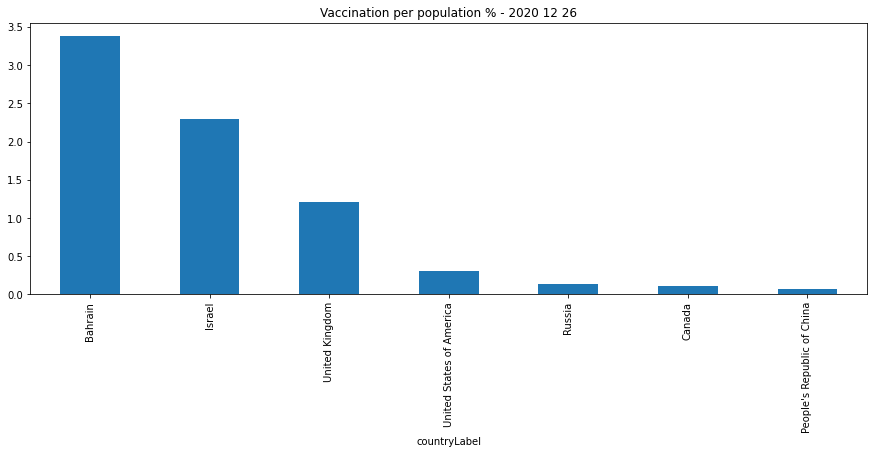

In [24]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData = CountriesData.set_index('countryLabel')

CountriesData["vaccinations_population_percent"].plot( y='countryLabel',kind = 'bar',figsize=(15,5)) 
plt.title("Vaccination per population % - " + start_time.strftime('%Y %m %d'))
plt.savefig('Corona_VaccinationperCountryPopulation.png') 
plt.show() 